<a href="https://colab.research.google.com/github/KashfiRashid/A3/blob/main/Copy_of_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content
!git clone https://github.com/comfyanonymous/ComfyUI.git
%cd /content/ComfyUI
!pip install -r requirements.txt -q
print("ComfyUI installed!")

/content
Cloning into 'ComfyUI'...
remote: Enumerating objects: 32285, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 32285 (delta 189), reused 145 (delta 145), pack-reused 31988 (from 3)
Receiving objects: 100% (32285/32285), 71.78 MiB | 21.06 MiB/s, done.
Resolving deltas: 100% (21907/21907), done.
/content/ComfyUI
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6

In [ ]:
%cd /content/ComfyUI/custom_nodes

# AnimateDiff Evolved
!git clone https://github.com/Kosinkadink/ComfyUI-AnimateDiff-Evolved.git

# Video helper nodes (for exporting video from ComfyUI)
!git clone https://github.com/Kosinkadink/ComfyUI-VideoHelperSuite.git

# Install extra requirements
!pip install -q opencv-python imageio imageio-ffmpeg

print("Extensions installed!")

/content/ComfyUI/custom_nodes
Cloning into 'ComfyUI-AnimateDiff-Evolved'...
remote: Enumerating objects: 3274, done.
remote: Counting objects: 100% (1507/1507), done.
remote: Compressing objects: 100% (348/348), done.
remote: Total 3274 (delta 1264), reused 1166 (delta 1159), pack-reused 1767 (from 3)
Receiving objects: 100% (3274/3274), 65.59 MiB | 39.30 MiB/s, done.
Resolving deltas: 100% (2289/2289), done.
Cloning into 'ComfyUI-VideoHelperSuite'...
remote: Enumerating objects: 3332, done.
remote: Counting objects: 100% (1589/1589), done.
remote: Compressing objects: 100% (365/365), done.
remote: Total 3332 (delta 1452), reused 1230 (delta 1223), pack-reused 1743 (from 2)
Receiving objects: 100% (3332/3332), 803.37 KiB | 14.35 MiB/s, done.
Resolving deltas: 100% (1966/1966), done.
Extensions installed!


In [ ]:
%cd /content/ComfyUI

!wget -q --show-progress -O models/checkpoints/dreamshaper_8.safetensors \
  "https://civitai.com/api/download/models/128713?type=Model&format=SafeTensor&size=pruned&fp=fp16"

print("Checkpoint downloaded!")

/content/ComfyUI
models/checkpoints/ 100%[===================>]   1.99G   114MB/s    in 20s     
Checkpoint downloaded!


In [ ]:
import os
ad_model_dir = "/content/ComfyUI/custom_nodes/ComfyUI-AnimateDiff-Evolved/models"
os.makedirs(ad_model_dir, exist_ok=True)

!wget -q --show-progress -O {ad_model_dir}/mm_sd_v15_v2.ckpt \
  "https://huggingface.co/guoyww/animatediff/resolve/main/mm_sd_v15_v2.ckpt"

print("AnimateDiff model downloaded!")

/content/ComfyUI/cu 100%[===================>]   1.69G   107MB/s    in 17s     
AnimateDiff model downloaded!


In [ ]:
!wget -q --show-progress -O models/controlnet/control_v11p_sd15_canny_fp16.safetensors \
  "https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_canny_fp16.safetensors"

print("ControlNet model downloaded!")

ControlNet model downloaded!


In [ ]:
import subprocess, sys, time

server_process = subprocess.Popen(
    [sys.executable, 'main.py', '--listen', '127.0.0.1', '--port', '8188', '--preview-method', 'none'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print("Starting ComfyUI server... waiting 30 seconds")
time.sleep(30)
print("Server ready!")

Starting ComfyUI server... waiting 30 seconds
Server ready!


In [ ]:
# Stop ComfyUI server to free GPU memory
server_process.terminate()
time.sleep(5)
torch.cuda.empty_cache()

# Install diffusers
!pip install diffusers transformers accelerate -q

print("Ready!")

Ready!


In [ ]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
from PIL import Image
import torch
import numpy as np
import os

# Load the model
model_path = "/content/ComfyUI/models/checkpoints/dreamshaper_8.safetensors"

pipe_txt2img = StableDiffusionPipeline.from_single_file(
    model_path,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")

pipe_img2img = StableDiffusionImg2ImgPipeline(
    vae=pipe_txt2img.vae,
    text_encoder=pipe_txt2img.text_encoder,
    tokenizer=pipe_txt2img.tokenizer,
    unet=pipe_txt2img.unet,
    scheduler=pipe_txt2img.scheduler,
    safety_checker=None,
    feature_extractor=None
).to("cuda")

# Create output folder
os.makedirs("/content/frames", exist_ok=True)

print("Model loaded!")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both

Model loaded!


  0%|          | 0/30 [00:00<?, ?it/s]

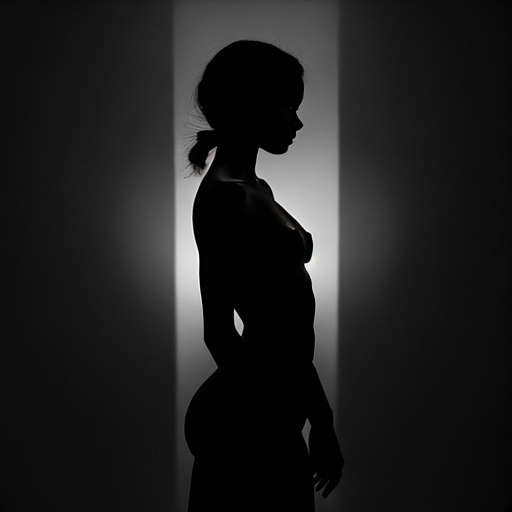

In [ ]:
# Generate the base silhouette
generator = torch.Generator(device="cuda").manual_seed(42)

silhouette = pipe_txt2img(
    prompt="dark black silhouette of a person from head to waist, centered, standing still, solid black figure on pure black background, single faint warm light pulse near chest, minimal, cinematic, dark void",
    negative_prompt="bright, colorful, detailed face, text, watermark, blurry, multiple people, background details, low quality, deformed",
    width=512,
    height=512,
    num_inference_steps=30,
    guidance_scale=7.5,
    generator=generator
).images[0]

# Save it
silhouette.save("/content/frames/silhouette_base.png")

# Display it
silhouette

  0%|          | 0/30 [00:00<?, ?it/s]

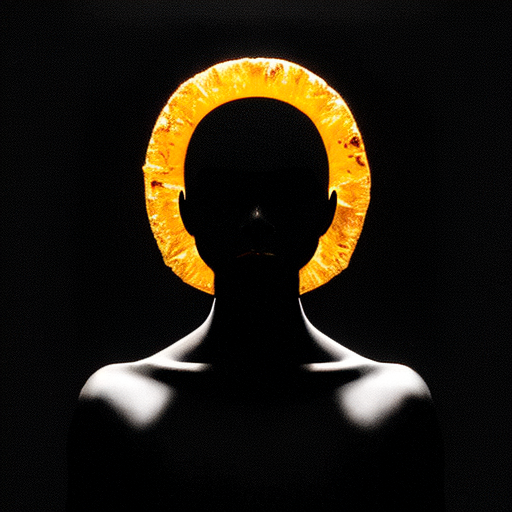

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(205)

silhouette = pipe_txt2img(
    prompt="abstract dark silhouette of a human figure head and shoulders, facing forward, centered in frame, completely surrounded by black void, no background light, faint tiny amber glow in center of chest, extremely dark, minimal, moody, matte black",
    negative_prompt="bright, backlight, rim light, blue, colorful, side view, profile, detailed face, detailed body, text, watermark, multiple people, low quality, deformed, background, gradient, feminine, sexy",
    width=512,
    height=512,
    num_inference_steps=30,
    guidance_scale=9.0,
    generator=generator
).images[0]

silhouette.save("/content/frames/silhouette_base.png")
silhouette